<h2>1. Contexte<h2/>

<h2>This notebook is dedicated to understanding the subject and exploring the data.<h2/>

<h3>"The dataset includes 174 metrics and 297,099 rows of data of tropical storms in the United States
collected from 1980 onwards. The data is raw, imperfect, and has not been cleaned or preprocessed."<h3/>

<h3>"Information about the dataset attributes can be found in the IBTRACS_variable_documentation file. Using the provided dataset, you are asked to train a model to predict the severity of a tropical cyclone based on geographical input data."<h3/>

We want to predict the 145th column of the dataset

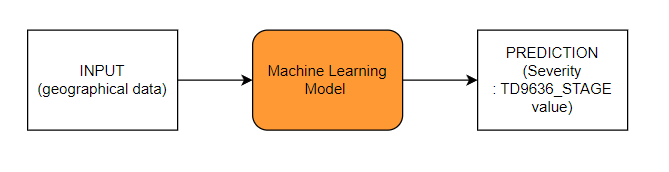

<h2>2. Data Exploration<h2/>

In [168]:
#Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px
import seaborn as sns

In [169]:
#Import and read the csv file, forcing the NaN values in case of formating issues. Display the 5 first rows

df = pd.read_csv("ibtracs.csv",low_memory=False, na_values=["", " ", "-", "NA", "N/A"],dtype=str) # to correct the formating issue when importing the csv
df.head(5)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,NaN,Year,NaN,NaN,NaN,NaN,NaN,NaN,degrees_north,degrees_east,...,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,1980001S13173,1980,1,SP,MM,PENI,1980-01-01 00:00:00,TS,-12.5,172.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,350
2,1980001S13173,1980,1,SP,MM,PENI,1980-01-01 03:00:00,TS,-12.2,172.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,350
3,1980001S13173,1980,1,SP,MM,PENI,1980-01-01 06:00:00,TS,-11.9,172.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,360
4,1980001S13173,1980,1,SP,MM,PENI,1980-01-01 09:00:00,TS,-11.7,172.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,10


We notice that the first row, that gives units of certain columns, will be an issue and should not stay in our dataset. We delete this row. 

In [170]:
df=df.drop(index=0)
df.head(5)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
1,1980001S13173,1980,1,SP,MM,PENI,1980-01-01 00:00:00,TS,-12.5,172.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,350
2,1980001S13173,1980,1,SP,MM,PENI,1980-01-01 03:00:00,TS,-12.2,172.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,350
3,1980001S13173,1980,1,SP,MM,PENI,1980-01-01 06:00:00,TS,-11.9,172.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,360
4,1980001S13173,1980,1,SP,MM,PENI,1980-01-01 09:00:00,TS,-11.7,172.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,10
5,1980001S13173,1980,1,SP,MM,PENI,1980-01-01 12:00:00,TS,-11.5,172.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,20


In [171]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])  # Convert to int ou float if possible
    except ValueError:
        pass  # Ignore errors

print(df.dtypes)

SID               object
SEASON             int64
NUMBER             int64
BASIN             object
SUBBASIN          object
                  ...   
USA_SEARAD_SE    float64
USA_SEARAD_SW    float64
USA_SEARAD_NW    float64
STORM_SPEED      float64
STORM_DIR        float64
Length: 174, dtype: object


In [172]:
# We highlight the columns that will be challenging, here the ones with NaN
df.isna().sum()

SID                   0
SEASON                0
NUMBER                0
BASIN             40518
SUBBASIN          32646
                  ...  
USA_SEARAD_SE    282038
USA_SEARAD_SW    283730
USA_SEARAD_NW    282124
STORM_SPEED           8
STORM_DIR             8
Length: 174, dtype: int64

In [173]:
# We count the number of NaN per columns to estimate the percentage of the df it represents
missing_values=df.isna().sum()
columns_with_missing = missing_values[missing_values >= 0]

# disable the display limit
pd.set_option("display.max_rows", None)

total_rows = len(df)
missing_percentage = (columns_with_missing / total_rows) * 100

print(missing_percentage.sort_values(ascending=False).to_frame(name="Missing Values Percentage"))

# reinitialize the configuration
pd.reset_option("display.max_rows")

                  Missing Values Percentage
MLC_LAT                          100.000000
TD9635_ROCI                      100.000000
REUNION_GUST                     100.000000
MLC_CLASS                        100.000000
MLC_WIND                         100.000000
MLC_PRES                         100.000000
TD9636_PRES                      100.000000
TD9635_LAT                       100.000000
TD9635_LON                       100.000000
TD9635_WIND                      100.000000
REUNION_R64_NW                   100.000000
REUNION_R64_NE                   100.000000
REUNION_R64_SW                   100.000000
REUNION_R64_SE                   100.000000
MLC_LON                          100.000000
TD9635_PRES                      100.000000
BOM_R64_NW                        99.806125
BOM_R64_SW                        99.800403
BOM_R64_SE                        99.795354
BOM_R64_NE                        99.792324
USA_RECORD                        99.754963
DS824_PRES                      

#### Now, we have a first look at the columns and especially a more detailed vue of the ones with the most of missing values and the one without missing values. As we see by that and by looking directly at the csv file,a lot of columns have a high percentage of missing values:  **151/174 columns have more than 50% of missing values, and 16/174 columns have no values at all**
#### We first decide to delete the columns that don't contain values, since they don't add anything.

In [174]:
empty_columns=missing_percentage[missing_percentage==100]
df_processed=df.drop(columns=empty_columns.index)
df_processed.shape

(297098, 158)

In [175]:
#type of KMA_CAT has been changed from object to int64 by the previous step, we correct it:
df_processed["KMA_CAT"] = df["KMA_CAT"]

#### Another important point to notice is that the target metric itself, TD9636_STAGE has 83,7% of missing values, so we can't just delete all the columns with "too many" missing values, we need to further our investigation.
#### And it means that there are 48343 rows with available value of TD9636_STAGE

In [176]:
df_processed.loc[df_processed.TD9636_STAGE.notna(),:]

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST,BOM_GUST_PER,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
1,1980001S13173,1980,1,SP,MM,PENI,1980-01-01 00:00:00,TS,-12.5,172.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,350.0
2,1980001S13173,1980,1,SP,MM,PENI,1980-01-01 03:00:00,TS,-12.2,172.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,350.0
3,1980001S13173,1980,1,SP,MM,PENI,1980-01-01 06:00:00,TS,-11.9,172.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,360.0
4,1980001S13173,1980,1,SP,MM,PENI,1980-01-01 09:00:00,TS,-11.7,172.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,10.0
5,1980001S13173,1980,1,SP,MM,PENI,1980-01-01 12:00:00,TS,-11.5,172.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67406,1989354N05155,1989,129,WP,MM,JACK,1989-12-29 00:00:00,TS,14.6,141.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,250.0
67407,1989354N05155,1989,129,WP,MM,JACK,1989-12-29 03:00:00,TS,14.4,141.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,250.0
67408,1989354N05155,1989,129,WP,MM,JACK,1989-12-29 06:00:00,TS,14.3,140.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,250.0
67409,1989354N05155,1989,129,WP,MM,JACK,1989-12-29 09:00:00,TS,14.1,140.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,250.0


### **Data Handling Options for `TD9636_STAGE`**

From now on, we have two main options:  

#### **Option 1: Keep only the rows where `TD9636_STAGE` is not missing**  
#### 📌 Advantages:  
- Ensures the model is trained only with complete data.  
- No need to handle missing target values.  
- Easier.  

#### 📌 Disadvantages:  
- We lose **83%** of the available data, which may limit model performance.  
- Risk of bias if the remaining data is not representative of the entire dataset.  


#### **Option 2: Attempt to impute `TD9636_STAGE` to retain more data**  
We could try predicting the missing values of `TD9636_STAGE` using other variables like latitude, longitude, pressure, wind, etc., before training the actual model.  

#### 📌 Advantages:  
- Uses more data, potentially improving model robustness.  
- Useful if the remaining data is biased (e.g., certain regions or years are overrepresented).  

#### 📌 Disadvantages:  
- Introduces uncertainty by predicting a variable that will later be used as the target.  
- If the imputation is poorly done, it may degrade the performance of the main model.  


---

## So let's analyse the remaining 48343 rows:
- If the remaining **48,343 rows** are sufficient and well-distributed, it's better to **drop rows with missing `TD9636_STAGE`** and train the model directly.  
- If analysis shows that the remaining data is too biased, then **smart imputation** should be considered. 


### Checking the temporal distribution:

In [177]:
df.SEASON.unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024, 2025])

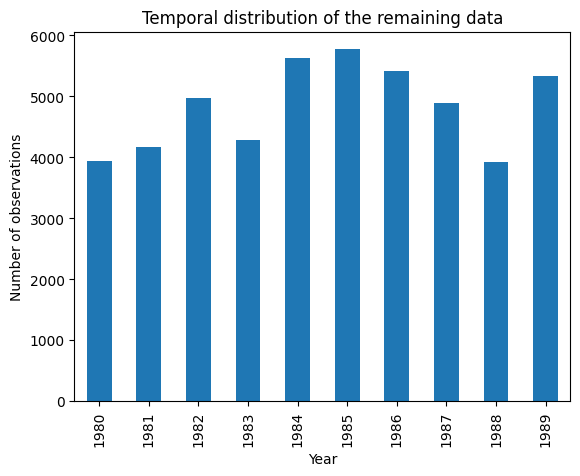

In [178]:
# filter rows where TD9636_STAGE not missing
df_remaining=df_processed.loc[df_processed.TD9636_STAGE.notna(),:]


# Visualization

df_remaining['SEASON'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Number of observations")
plt.title("Temporal distribution of the remaining data")
plt.show()

### We immediatly see that there are no datas after 1989, which means that we can't keep only these 48343 remaining rows, it would be **biased**.
By doing some research on the IBTRACS datas, we found that "The TD9636 dataset was constructed in the 1960s and 1970s by NOAA/National Climatic Center (now called NCEI). It represents a global collection of storms derived from multiple sources. It has not been updated since the 1980s.Data from TC 9636 is used in IBTrACS outside of the North Atlantic and before 1980."
**Which explains this lack of data after 1989.**

*Source :* [IBTrACS version4r01 Technical Details.pdf](https://www.ncei.noaa.gov/sites/g/files/anmtlf171/files/2024-06/IBTrACS%20version4r01%20Technical%20Details.pdf)

### We have to impute TD9636_STAGE to retain more data, but for that we need to analyse the other metrics to have a good and precise imputation.

### So let's go back to analysing our columns:


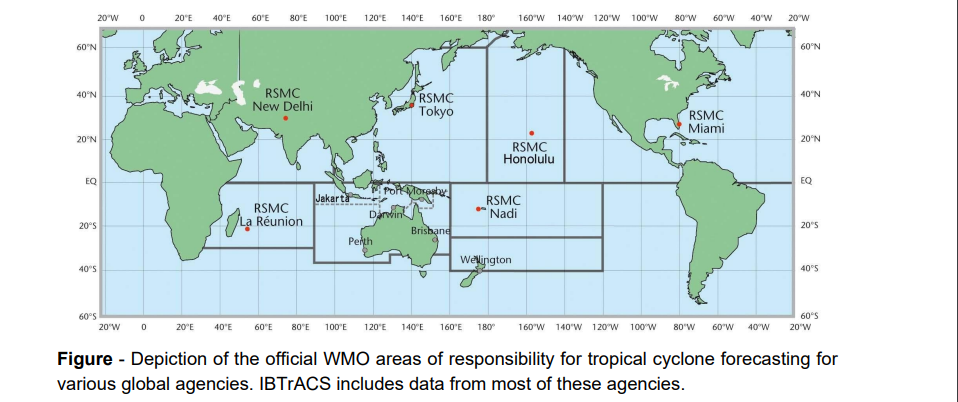

The particularity of this dataset is that the data comes from several geographical regions, so we need to adopt a clever approach to cleansing the database by deleting redundant columns.
So we choose to keep the geographical data that sums up all the different agencies ( and with few missing values), and we also drop the features with poor info like Ids,...


In [179]:
df_processed.columns

Index(['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME',
       'NATURE', 'LAT', 'LON',
       ...
       'BOM_GUST', 'BOM_GUST_PER', 'REUNION_GUST_PER', 'USA_SEAHGT',
       'USA_SEARAD_NE', 'USA_SEARAD_SE', 'USA_SEARAD_SW', 'USA_SEARAD_NW',
       'STORM_SPEED', 'STORM_DIR'],
      dtype='object', length=158)

In [180]:
df_processed["BASIN"] = df_processed["BASIN"].replace("MM", np.nan)
df_processed["SUBBASIN"] = df_processed["SUBBASIN"].replace("MM", np.nan)
df_processed["NATURE"] = df_processed["NATURE"].replace("NR", np.nan)

In [181]:
df_processed["SUBBASIN"].isna().sum()

np.int64(230307)

In [182]:
cols_to_keep=['SEASON','BASIN','NATURE','LAT','LON','DIST2LAND','LANDFALL','STORM_SPEED','STORM_DIR','TD9636_STAGE','TD9636_LAT','TD9636_LON','TD9636_WIND']

In [183]:
df_processed = df_processed[cols_to_keep]
df_processed.shape

(297098, 13)

In [184]:
#we recalculate the percentages
missing_values=df_processed.isna().sum()
total_rows = len(df_processed)
missing_percentage = (missing_values/ total_rows) * 100
missing_percentage

SEASON           0.000000
BASIN           13.637924
NATURE           6.841514
LAT              0.000000
LON              0.000000
DIST2LAND        0.000000
LANDFALL         1.604521
STORM_SPEED      0.002693
STORM_DIR        0.002693
TD9636_STAGE    83.728265
TD9636_LAT      84.078991
TD9636_LON      84.078991
TD9636_WIND     86.638752
dtype: float64

In [185]:
#We  separate numerical and categorical columns
num_cols = df_processed.select_dtypes(include=['number']).columns.tolist()
cat_cols = df_processed.select_dtypes(exclude=['number']).columns.tolist()

print(f" Numerical columns : {len(num_cols)}")
print(f" Categorical columns, to encode : {len(cat_cols)}")


 Numerical columns : 11
 Categorical columns, to encode : 2


In [186]:
cat_cols

['BASIN', 'NATURE']

In [187]:
df_le=df_processed.copy()

In [188]:
#Encode categorical columns
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    le = LabelEncoder()
    df_le[col] = le.fit_transform(df_le[col])

In [189]:
df_le.loc[:,cat_cols]

,BASIN,NATURE
1,4,4
2,4,4
3,4,4
4,4,4
5,4,4
...,...,...
297094,5,5
297095,5,5
297096,5,5
297097,5,5


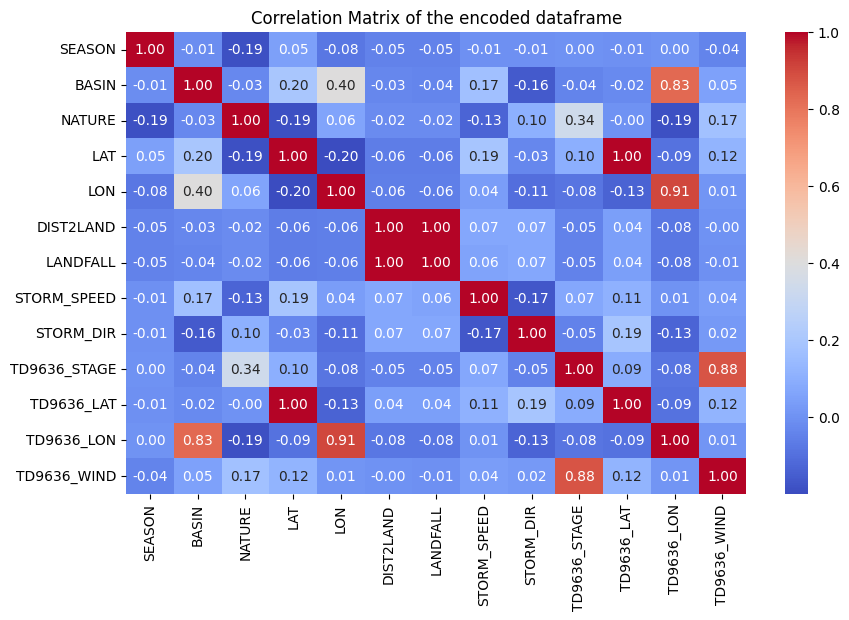

In [190]:
# Correlation between columns
correlation_matrix = df_le.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of the encoded dataframe")
plt.show()

Among those, if two features are too correlated (here 1 or 0.9), we keep only one, refering the documentation to keep the more relevant.
- Between LANDFALL and DIST2LAND we keep DIST2LAND (no missing values)
- Between LAT and TD9636_LAT we keep LAT (no missing values)
- Between LON and TD9636_LON we keep LON (no missing values)

In [191]:
df_le= df_le.drop(columns=[ "LANDFALL","TD9636_LAT", "TD9636_LON"])
df_le.shape

(297098, 10)

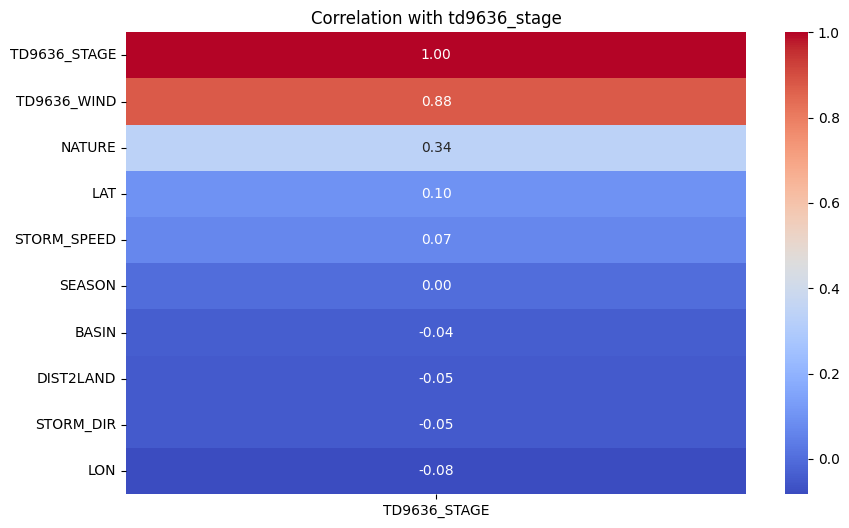

In [192]:
correlation_matrix = df_le.corr()
correlation_td9636 = correlation_matrix[["TD9636_STAGE"]].sort_values(by='TD9636_STAGE',ascending=False)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_td9636, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation with td9636_stage")
plt.show()


In [193]:
#missing values 
missing_values=df_le.isna().sum()
missing_values[missing_values>0]

STORM_SPEED          8
STORM_DIR            8
TD9636_STAGE    248755
TD9636_WIND     257402
dtype: int64

-----

We still have to work on our data to solve the issue of missing values.
Now, we search the rows with lots of missing values to delete them.

In [194]:
# Number of missing value by row
df_le['missing_count'] = df_le.isna().sum(axis=1)

# Sorting
df_sorted = df_le.sort_values(by='missing_count', ascending=False)

# print 
df_sorted


,SEASON,BASIN,NATURE,LAT,LON,DIST2LAND,STORM_SPEED,STORM_DIR,TD9636_STAGE,TD9636_WIND,missing_count
66333,1989,0,4,11.3,-101.3,628,NaN,NaN,NaN,NaN,4
17146,1982,1,4,26.0,80.0,0,NaN,NaN,NaN,NaN,4
66785,1989,1,4,10.5,84.0,367,NaN,NaN,NaN,NaN,4
55467,1988,1,4,21.0,88.5,67,NaN,NaN,NaN,NaN,4
62587,1989,1,4,11.2,88.2,807,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...
58736,1988,0,4,13.4,-90.2,39,7.0,290.0,2.0,58.0,0
58735,1988,0,4,13.3,-89.9,24,8.0,295.0,2.0,59.0,0
65,1980,4,4,-16.8,138.5,0,5.0,145.0,1.0,30.0,0
58734,1988,0,4,13.1,-89.5,44,8.0,290.0,2.0,60.0,0


In [195]:
len(df_sorted[df_sorted['missing_count']==4])

7

We delete the rows with four missing values **(it reprents 7 rows)**

In [196]:
rows_to_delete=df_sorted[df_sorted['missing_count']==4].index
df_le.drop(index=rows_to_delete,inplace=True)
df_le.shape

(297091, 11)

In [197]:
# we delete the rows with missing values for STORM speed and dir
#it appears to be the same row, 22706
df_le.loc[df_le["STORM_DIR"].isna()]

,SEASON,BASIN,NATURE,LAT,LON,DIST2LAND,STORM_SPEED,STORM_DIR,TD9636_STAGE,TD9636_WIND,missing_count
22706,1983,5,0,14.5,141.5,1747,NaN,NaN,0.0,NaN,3


In [198]:
df_le.drop(index=22706,inplace=True)
#missing values
missing_values=df_le.isna().sum()
missing_values[missing_values>0]

TD9636_STAGE    248748
TD9636_WIND     257394
dtype: int64

## Let's take a look at the situation:
**🔹TD9636_STAGE is the target metric,with missing values**
-> As this is the target variable of our model (the one we want to predict), we need to be very careful about how we treat these NaNs.
If we fill in these values naively (e.g.: mean or median), we run the risk of introducing biases that will distort the model. If we delete them all, we lose too much data, which could degrade the model's performance+ we saw that we can't keep only the rows with available values because too old.

**🔹TD9636_WIND is a numerical metric, with missing values.**
-> need an imputation


### Here, the action plan is:
*1. Imputing TD9636_WIND metric*

*2.Managing the missing values of the target, TD9636_STAGE*

In [199]:
df_le.TD9636_WIND.describe()

count    39696.000000
mean        49.299627
std         25.448259
min          5.000000
25%         30.000000
50%         42.000000
75%         65.000000
max        155.000000
Name: TD9636_WIND, dtype: float64

In [200]:
df_le.TD9636_WIND.median()

np.float64(42.0)

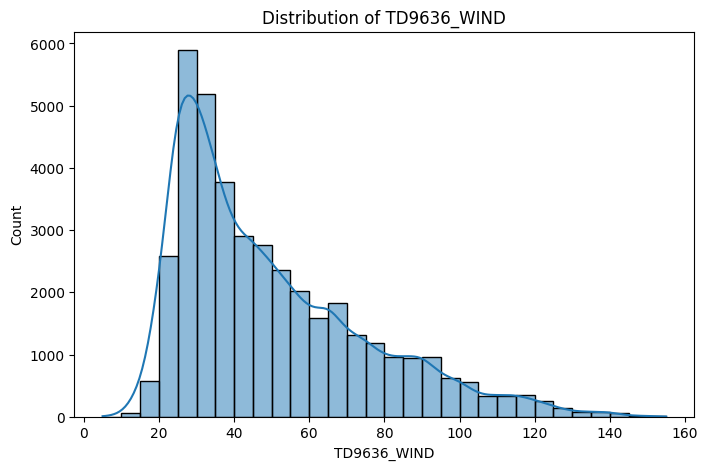

In [201]:
#we start with looking at the distribution to choose between mean or median
plt.figure(figsize=(8, 5))
sns.histplot(df_le['TD9636_WIND'].dropna(), bins=30, kde=True)
plt.title("Distribution of TD9636_WIND")
plt.show()

The distribution is asymetrical (skewed right),so the median is the more reliable option to impute our td9636_WIND column

In [202]:
df_le.groupby(['BASIN'])['TD9636_WIND'].agg(['mean', 'median'])

,mean,median
BASIN,,
0,49.650462,41.0
1,39.238235,34.0
2,NaN,NaN
3,46.832182,40.0
4,45.599745,40.0
5,52.189176,45.0
6,NaN,NaN


In [203]:
df_le.loc[(df_le['BASIN'] == 'SA') & df_le['TD9636_WIND'].isna(), 'TD9636_WIND']=42

In [204]:
median_wind = df_le.groupby('BASIN')['TD9636_WIND'].median().to_dict()

In [207]:
def WIND_guesser(BASIN):
    BASIN= int(BASIN)
    wind = median_wind[BASIN]
    return wind

In [208]:
df_le.loc[df_le["TD9636_WIND"].isna(), "TD9636_WIND"] = df_le.loc[df_le["TD9636_WIND"].isna(), "BASIN"].apply(WIND_guesser)


In [209]:
df_le.isna().sum()

SEASON                0
BASIN                 0
NATURE                0
LAT                   0
LON                   0
DIST2LAND             0
STORM_SPEED           0
STORM_DIR             0
TD9636_STAGE     248748
TD9636_WIND       40637
missing_count         0
dtype: int64

In [213]:
df_le = df_le.dropna(subset=['TD9636_WIND'])
df_le.isna().sum()

SEASON                0
BASIN                 0
NATURE                0
LAT                   0
LON                   0
DIST2LAND             0
STORM_SPEED           0
STORM_DIR             0
TD9636_STAGE     208111
TD9636_WIND           0
missing_count         0
dtype: int64

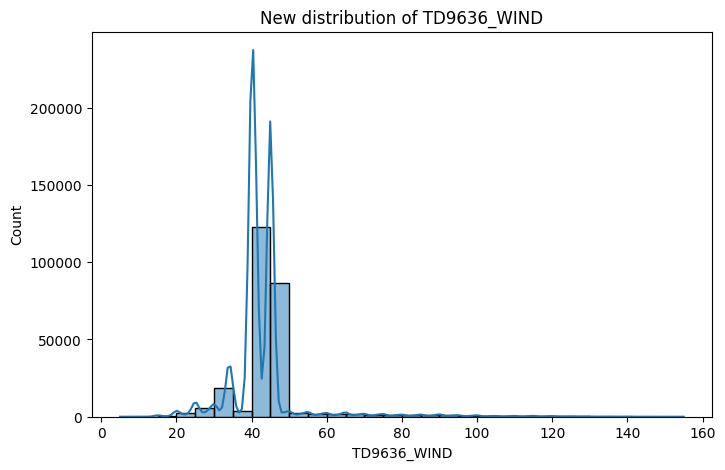

In [214]:
plt.figure(figsize=(8, 5))
sns.histplot(df_le['TD9636_WIND'].dropna(), bins=30, kde=True)
plt.title("New distribution of TD9636_WIND")
plt.show()

## The distribution is too different after the transformartion so our data are too biased
## Conlusion to this approach: not sure it would be a viable dataset,because of many transformation, especially on the target feature.
## We prefer to keep the datas were the target feature is available